In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv("빅분기 실기/X_train.csv",encoding="cp949")
X_test = pd.read_csv("빅분기 실기/X_test.csv",encoding="cp949")
y_train = pd.read_csv("빅분기 실기/y_train.csv",encoding="cp949")

In [11]:
X_train[["주구매상품"]]

,주구매상품
0,기타
1,스포츠
2,남성 캐주얼
3,기타
4,보석
...,...
3495,골프
3496,시티웨어
3497,주방용품
3498,화장품


In [97]:
XY = pd.concat([X_train,y_train],axis=1)
XY[XY["주구매상품"].str.startswith("남성")].gender

2       1
12      1
122     0
195     1
201     0
       ..
3316    1
3348    1
3405    0
3468    1
3477    1
Name: gender, Length: 79, dtype: int64

In [98]:
61/79

0.7721518987341772

In [8]:
X = pd.concat([X_train,X_test])
X.head(5)

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85


In [12]:
new_X = X.fillna(0)
new_X.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85


In [21]:
X[X["총구매액"] < 0]

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
1659,1659,-2992000,-2992000,2992000.0,디자이너,본 점,1,1.000000,0.000000,0
3174,3174,-52421520,13616000,97222000.0,기타,본 점,18,4.444444,0.337500,16
3488,3488,-18905600,82306000,529602320.0,디자이너,부산본점,31,1.064516,0.242424,11
579,4079,-150000,-150000,150000.0,구두,분당점,1,1.000000,0.000000,0
1177,4677,-37440000,-37440000,37440000.0,대형가전,본 점,1,1.000000,0.000000,0


In [36]:
IQR = (X_train["총구매액"].quantile(0.75)) -  (X_train["총구매액"].quantile(0.25))
IQR

101760880.0

In [70]:
IQRb = (X_train["최대구매액"].quantile(0.75)) -  (X_train["최대구매액"].quantile(0.25))
IQRb

20087500.0

In [74]:
X_train["총구매액"].describe()

count    3.500000e+03
mean     9.191925e+07
std      1.635065e+08
min     -5.242152e+07
25%      4.747050e+06
50%      2.822270e+07
75%      1.065079e+08
max      2.323180e+09
Name: 총구매액, dtype: float64

(array([2.972e+03, 3.680e+02, 1.120e+02, 2.500e+01, 1.100e+01, 6.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([-5.24215200e+07,  1.85138639e+08,  4.22698798e+08,  6.60258957e+08,
         8.97819116e+08,  1.13537928e+09,  1.37293943e+09,  1.61049959e+09,
         1.84805975e+09,  2.08561991e+09,  2.32318007e+09]),
 <BarContainer object of 10 artists>)

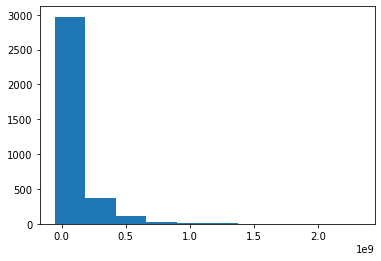

In [83]:
plt.hist(X_train["총구매액"], bins=10)

In [38]:
X_train[(X_train["총구매액"] > X_train["총구매액"].quantile(0.75) + 1.5*IQR) |
       (X_train["총구매액"] < X_train["총구매액"].quantile(0.25) - 1.5*IQR)]

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
7,7,514570080,27104000,29524000.0,명품,본 점,63,2.634921,0.222892,5
8,8,688243360,173088000,NaN,기타,본 점,18,5.944444,0.411215,15
15,15,802390550,123488000,87054200.0,기타,본 점,152,3.585526,0.177982,2
16,16,359589000,73684240,NaN,골프,본 점,26,2.230769,0.362069,13
26,26,301903130,53050000,21241000.0,기타,본 점,53,2.792453,0.493243,6
...,...,...,...,...,...,...,...,...,...,...
3435,3435,432104650,53822300,109025800.0,기타,관악점,76,3.539474,0.468401,4
3446,3446,501501260,111200000,78034800.0,농산물,분당점,67,5.164179,0.208092,5
3472,3472,311956630,18175000,54145400.0,기타,노원점,72,7.263889,0.367113,5
3490,3490,330675700,85050000,NaN,디자이너,동래점,23,1.695652,0.179487,15


In [72]:
X_train[(X_train["최대구매액"] > X_train["최대구매액"].quantile(0.75) + 1.5*IQRb) |
       (X_train["최대구매액"] < X_train["최대구매액"].quantile(0.25) - 1.5*IQRb)]

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
8,8,688243360,173088000,NaN,기타,본 점,18,5.944444,0.411215,15
10,10,245110760,67275000,22484000.0,디자이너,부산본점,25,2.120000,0.226415,13
15,15,802390550,123488000,87054200.0,기타,본 점,152,3.585526,0.177982,2
16,16,359589000,73684240,NaN,골프,본 점,26,2.230769,0.362069,13
55,55,125864310,54000000,NaN,가공식품,안양점,23,2.913043,0.283582,15
...,...,...,...,...,...,...,...,...,...,...
3435,3435,432104650,53822300,109025800.0,기타,관악점,76,3.539474,0.468401,4
3446,3446,501501260,111200000,78034800.0,농산물,분당점,67,5.164179,0.208092,5
3488,3488,-18905600,82306000,529602320.0,디자이너,부산본점,31,1.064516,0.242424,11
3490,3490,330675700,85050000,NaN,디자이너,동래점,23,1.695652,0.179487,15


In [58]:
X_train["주구매상품"].unique()

array(['기타', '스포츠', '남성 캐주얼', '보석', '디자이너', '시티웨어', '명품', '농산물', '화장품',
       '골프', '구두', '가공식품', '수산품', '아동', '차/커피', '캐주얼', '섬유잡화', '육류',
       '축산가공', '젓갈/반찬', '액세서리', '피혁잡화', '일용잡화', '주방가전', '주방용품', '건강식품',
       '가구', '주류', '모피/피혁', '남성 트랜디', '셔츠', '남성정장', '생활잡화', '트래디셔널',
       '란제리/내의', '커리어', '침구/수예', '대형가전', '통신/컴퓨터', '식기', '소형가전', '악기'],
      dtype=object)

In [47]:
X_test["주구매상품"].unique()

array(['골프', '농산물', '가공식품', '주방용품', '수산품', '화장품', '기타', '스포츠', '디자이너',
       '시티웨어', '구두', '캐주얼', '명품', '건강식품', '남성정장', '커리어', '남성 캐주얼', '축산가공',
       '식기', '피혁잡화', '모피/피혁', '섬유잡화', '트래디셔널', '차/커피', '육류', '가구', '아동',
       '셔츠', '액세서리', '젓갈/반찬', '대형가전', '일용잡화', '통신/컴퓨터', '생활잡화', '주방가전',
       '란제리/내의', '남성 트랜디', '보석', '주류', '침구/수예', '악기'], dtype=object)

In [65]:
X_train["주구매상품"].value_counts()

기타        595
가공식품      546
농산물       339
화장품       264
시티웨어      213
디자이너      193
수산품       153
캐주얼       101
명품        100
섬유잡화       98
골프         82
스포츠        69
일용잡화       64
모피/피혁      57
육류         57
남성 캐주얼     55
구두         54
건강식품       47
차/커피       44
아동         40
피혁잡화       40
축산가공       35
주방용품       32
셔츠         30
젓갈/반찬      29
주방가전       26
트래디셔널      23
남성정장       22
생활잡화       15
주류         14
가구         10
커리어         9
대형가전        8
란제리/내의      8
식기          7
액세서리        5
침구/수예       4
통신/컴퓨터      3
보석          3
남성 트랜디      2
악기          2
소형가전        2
Name: 주구매상품, dtype: int64

In [67]:
X_train["주구매지점"].value_counts()

본  점     1077
잠실점       474
분당점       436
부산본점      245
영등포점      241
일산점       198
강남점       145
광주점       114
노원점        90
청량리점       86
대전점        70
미아점        69
부평점        57
동래점        49
관악점        46
인천점        34
안양점        29
포항점        11
대구점         7
센텀시티점       6
울산점         6
전주점         5
창원점         4
상인점         1
Name: 주구매지점, dtype: int64

In [69]:
X_test["주구매상품"].value_counts()

기타        465
가공식품      395
농산물       235
화장품       177
시티웨어      168
디자이너      123
수산품        86
섬유잡화       72
캐주얼        65
명품         60
차/커피       55
모피/피혁      47
골프         47
남성 캐주얼     46
구두         44
스포츠        43
육류         38
건강식품       36
일용잡화       30
축산가공       28
남성정장       25
셔츠         25
아동         24
주방용품       21
젓갈/반찬      18
피혁잡화       16
주류         10
주방가전       10
란제리/내의     10
트래디셔널       9
식기          8
생활잡화        8
액세서리        7
가구          7
커리어         6
대형가전        6
남성 트랜디      4
통신/컴퓨터      3
침구/수예       3
보석          1
악기          1
Name: 주구매상품, dtype: int64